In [3]:
# http://www.cnblogs.com/NaughtyBaby/p/5469469.html
# https://grouplens.org/datasets/movielens/
user_data = sc.textFile("/spark/ml-100k/u.user")

In [5]:
user_data.first()

u'1|24|M|technician|85711'

In [25]:
user_fields = user_data.map(lambda line: line.split("|"))

In [12]:
num_users = user_fields.map(lambda fields: fields[0]).count()
num_genders = user_fields.map(lambda fields: fields[2]).distinct().count()
num_occupations = user_fields.map(lambda fields: fields[3]).distinct().count()
num_zipcodes = user_fields.map(lambda fields: fields[4]).distinct().count()
print "Users: %d, genders: %d, occupations: %d, ZIP codes: %d" % (num_users, num_genders, num_occupations, num_zipcodes)

Users: 943, genders: 2, occupations: 21, ZIP codes: 795


In [14]:
%matplotlib inline
import matplotlib.pyplot as plt

(array([ 0.00064269,  0.00192808,  0.00449886,  0.0279572 ,  0.02956393,
         0.03374144,  0.04563129,  0.02538642,  0.02088756,  0.01863813,
         0.02088756,  0.01606735,  0.0170314 ,  0.01863813,  0.00674829,
         0.00482021,  0.0054629 ,  0.00192808,  0.00128539,  0.00128539]),
 array([  7. ,  10.3,  13.6,  16.9,  20.2,  23.5,  26.8,  30.1,  33.4,
         36.7,  40. ,  43.3,  46.6,  49.9,  53.2,  56.5,  59.8,  63.1,
         66.4,  69.7,  73. ]),
 <a list of 20 Patch objects>)

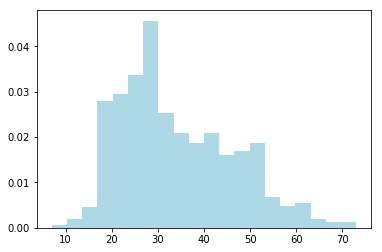

In [24]:
ages = user_fields.map(lambda x: int(x[1])).collect()
plt.hist(ages, bins=20, color='lightblue', normed=True)

(array([   8.,  101.,  197.,  221.,  123.,  115.,  111.,   36.,   23.,    8.]),
 array([  7. ,  13.6,  20.2,  26.8,  33.4,  40. ,  46.6,  53.2,  59.8,
         66.4,  73. ]),
 <a list of 10 Patch objects>)

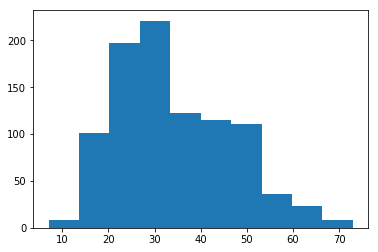

In [19]:
plt.hist(ages)

In [27]:
count_by_occupation = user_fields.map(lambda fields: (fields[3],1)).reduceByKey(lambda x,y: x+y).collect()

In [28]:
count_by_occupation

[(u'administrator', 79),
 (u'retired', 14),
 (u'lawyer', 12),
 (u'none', 9),
 (u'student', 196),
 (u'technician', 27),
 (u'programmer', 66),
 (u'salesman', 12),
 (u'homemaker', 7),
 (u'executive', 32),
 (u'doctor', 7),
 (u'entertainment', 18),
 (u'marketing', 26),
 (u'writer', 45),
 (u'scientist', 31),
 (u'educator', 95),
 (u'healthcare', 16),
 (u'librarian', 51),
 (u'artist', 28),
 (u'other', 105),
 (u'engineer', 67)]